bank client data:
* 1 - age (numeric)

* 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

* 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

* 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: "cellular","telephone")
* 9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

* 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* 14 - previous: number of contacts performed before this campaign and for this client (numeric)

* 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

social and economic context attributes
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)

* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

* 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

* 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

# Data Wrangling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:
bank_df = pd.read_csv('bank.csv', delimiter=';')

# Shows every column
pd.set_option('display.max_columns', None)

bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
print(f'Columns: {bank_df.shape[1]}\nRegisters: {bank_df.shape[0]}')

Columns: 17
Registers: 4521


In [6]:
numerical_features = list(bank_df._get_numeric_data().columns)

print(f'Numerical features:\n', *numerical_features, sep='\n- ',
    end=f'\n\nNumber of numerical features: {len(numerical_features)}')

Numerical features:

- age
- balance
- day
- duration
- campaign
- pdays
- previous

Number of numerical features: 7

In [7]:
categorical_features = list(set(bank_df.columns) - set(numerical_features))
print(f'Categorical features:\n', *categorical_features, sep='\n- ',
    end=f'\n\nNumber of categorical features: {len(categorical_features)}')

Categorical features:

- default
- housing
- contact
- month
- education
- job
- y
- poutcome
- marital
- loan

Number of categorical features: 10

In [8]:
# Number of unique values each categorical feature has
bank_df[categorical_features].nunique()

default       2
housing       2
contact       3
month        12
education     4
job          12
y             2
poutcome      4
marital       3
loan          2
dtype: int64

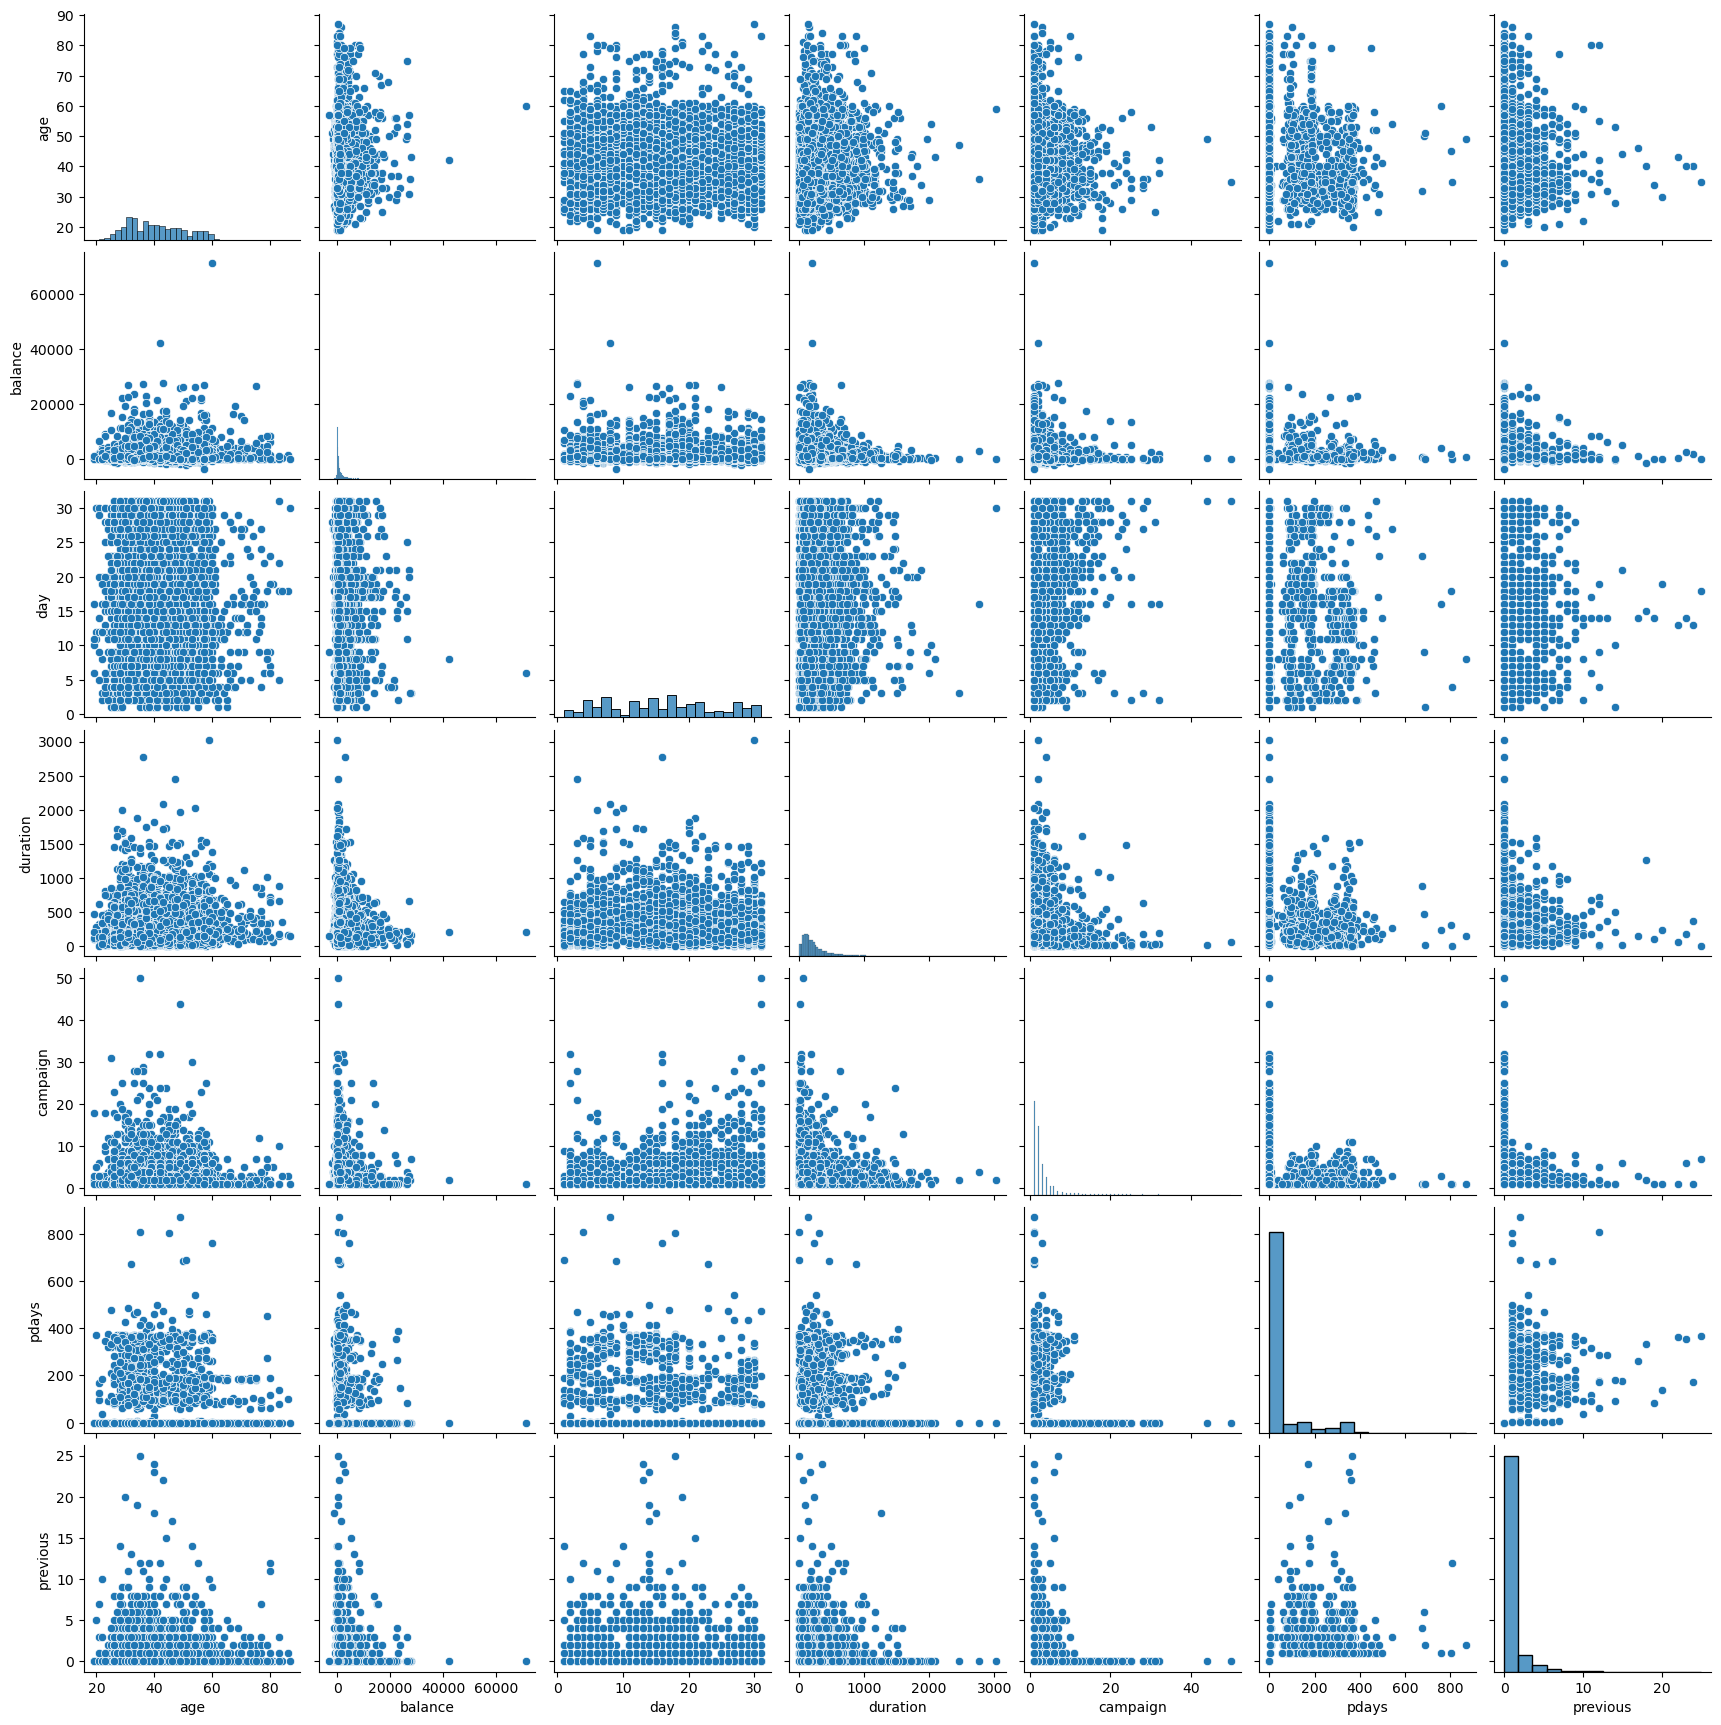

In [9]:
sns.pairplot(bank_df)

In [10]:
# Encoding categorical features
encoded_df = pd.DataFrame()
encoded_df[categorical_features] = bank_df[categorical_features].apply(LabelEncoder().fit_transform)
encoded_df[numerical_features] = bank_df[numerical_features]
encoded_df

,default,housing,contact,month,education,job,y,poutcome,marital,loan,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,10,0,10,0,3,1,0,30,1787,19,79,1,-1,0
1,0,1,0,8,1,7,0,0,1,1,33,4789,11,220,1,339,4
2,0,1,0,0,2,4,0,0,2,0,35,1350,16,185,1,330,1
3,0,1,2,6,2,4,0,3,1,1,30,1476,3,199,4,-1,0
4,0,1,2,8,1,1,0,3,1,0,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,1,0,5,1,7,0,3,1,0,33,-333,30,329,5,-1,0
4517,1,1,2,8,2,6,0,3,1,1,57,-3313,9,153,1,-1,0
4518,0,0,0,1,1,9,0,3,1,0,57,295,19,151,11,-1,0
4519,0,0,0,3,1,1,0,1,1,0,28,1137,6,129,4,211,3


In [11]:
# Features
X = encoded_df.drop(columns=['y'], axis='columns')
bank_features = X.columns

# Target
y = encoded_df['y']

Principal Component Analysis

In [12]:
# Centering data around their mean before applying the PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=encoded_df.drop(columns=['y'], axis='columns').columns)
X

,default,housing,contact,month,education,job,poutcome,marital,loan,age,balance,day,duration,campaign,pdays,previous
0,-0.130759,-1.142051,-0.723642,1.485414,-1.644755,1.716804,0.444413,-0.246429,-0.424756,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413
1,-0.130759,0.875617,-0.723642,0.819288,-0.309038,0.795246,-2.579961,-0.246429,2.354292,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734
2,-0.130759,0.875617,-0.723642,-1.845220,1.026680,-0.126313,-2.579961,1.421396,-0.424756,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124
3,-0.130759,0.875617,1.495133,0.153161,1.026680,-0.126313,0.444413,-0.246429,2.354292,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413
4,-0.130759,0.875617,1.495133,0.819288,-0.309038,-1.047871,0.444413,-0.246429,-0.424756,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.130759,0.875617,-0.723642,-0.179903,-0.309038,0.795246,0.444413,-0.246429,-0.424756,-0.772583,-0.583410,1.707910,0.250315,0.709566,-0.407218,-0.320413
4517,7.647669,0.875617,1.495133,0.819288,1.026680,0.488060,0.444413,-0.246429,2.354292,1.496912,-1.573671,-0.838546,-0.427057,-0.576829,-0.407218,-0.320413
4518,-0.130759,-1.142051,-0.723642,-1.512157,-0.309038,1.409618,0.444413,-0.246429,-0.424756,1.496912,-0.374724,0.374052,-0.434754,2.639160,-0.407218,-0.320413
4519,-0.130759,-1.142051,-0.723642,-0.846030,-0.309038,-1.047871,-1.571836,-0.246429,-0.424756,-1.245394,-0.094925,-1.202326,-0.519426,0.387967,1.710451,1.451197


<AxesSubplot: >

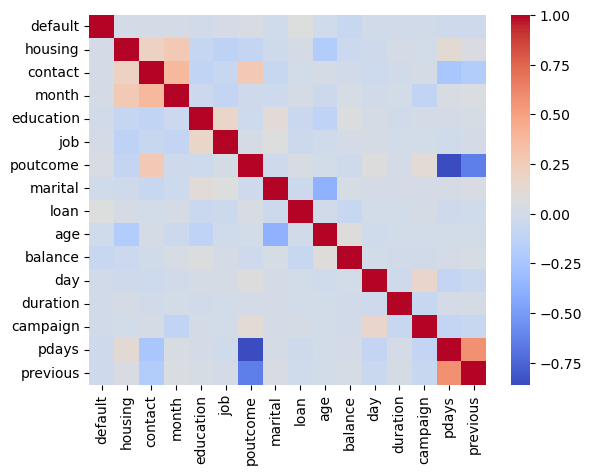

In [13]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([0.15900594, 0.10569819, 0.09186163, 0.07430061, 0.07133231,
       0.06466161, 0.06074001, 0.0581769 , 0.05723607, 0.0531467 ,
       0.05179714, 0.04740918, 0.03411729, 0.03346899, 0.02860505,
       0.00844238])

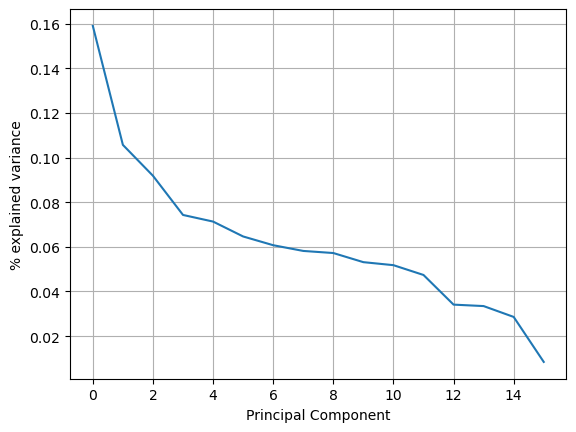

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.grid()
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

Customer Segmentation - Clustering using K-Means

In [16]:
from sklearn.cluster import KMeans

wcss = [KMeans(n_clusters=i, random_state=0).fit(encoded_df.drop(columns=['y'], axis='columns')).inertia_ for i in range(1, 11)]
wcss.sort(reverse=True)
wcss


[41293303441.26345,
 17899796571.18823,
 9862282339.967348,
 6657445404.798299,
 4403664399.277286,
 3043865260.99144,
 2233669291.4538684,
 1843777793.3353913,
 1530346999.0702846,
 1297945864.8462832]

Elbow Method

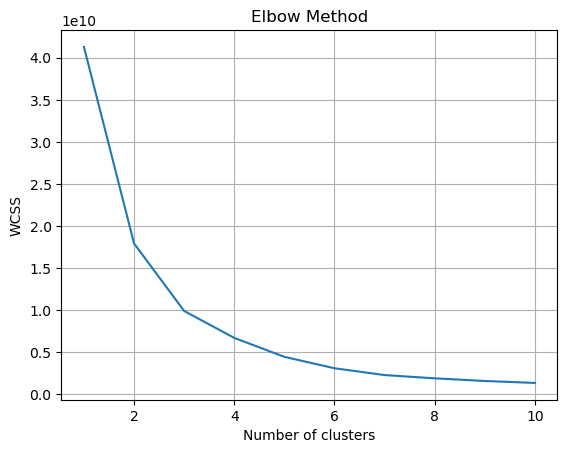

In [17]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Number of clusters: 3 since by this number we can notice a faster decrease

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(encoded_df)
encoded_df["cluster"] = y_pred
encoded_df

,default,housing,contact,month,education,job,y,poutcome,marital,loan,age,balance,day,duration,campaign,pdays,previous,cluster
0,0,0,0,10,0,10,0,3,1,0,30,1787,19,79,1,-1,0,0
1,0,1,0,8,1,7,0,0,1,1,33,4789,11,220,1,339,4,2
2,0,1,0,0,2,4,0,0,2,0,35,1350,16,185,1,330,1,0
3,0,1,2,6,2,4,0,3,1,1,30,1476,3,199,4,-1,0,0
4,0,1,2,8,1,1,0,3,1,0,59,0,5,226,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,1,0,5,1,7,0,3,1,0,33,-333,30,329,5,-1,0,0
4517,1,1,2,8,2,6,0,3,1,1,57,-3313,9,153,1,-1,0,0
4518,0,0,0,1,1,9,0,3,1,0,57,295,19,151,11,-1,0,0
4519,0,0,0,3,1,1,0,1,1,0,28,1137,6,129,4,211,3,0


In [19]:
# reversing the encoding
encoded_df[categorical_features] = bank_df[categorical_features]
encoded_df.head(40)

,default,housing,contact,month,education,job,y,poutcome,marital,loan,age,balance,day,duration,campaign,pdays,previous,cluster
0,no,no,cellular,oct,primary,unemployed,no,unknown,married,no,30,1787,19,79,1,-1,0,0
1,no,yes,cellular,may,secondary,services,no,failure,married,yes,33,4789,11,220,1,339,4,2
2,no,yes,cellular,apr,tertiary,management,no,failure,single,no,35,1350,16,185,1,330,1,0
3,no,yes,unknown,jun,tertiary,management,no,unknown,married,yes,30,1476,3,199,4,-1,0,0
4,no,yes,unknown,may,secondary,blue-collar,no,unknown,married,no,59,0,5,226,1,-1,0,0
5,no,no,cellular,feb,tertiary,management,no,failure,single,no,35,747,23,141,2,176,3,0
6,no,yes,cellular,may,tertiary,self-employed,no,other,married,no,36,307,14,341,1,330,2,0
7,no,yes,cellular,may,secondary,technician,no,unknown,married,no,39,147,6,151,2,-1,0,0
8,no,yes,unknown,may,tertiary,entrepreneur,no,unknown,married,no,41,221,14,57,2,-1,0,0
9,no,yes,cellular,apr,primary,services,no,failure,married,yes,43,-88,17,313,1,147,2,0


In [100]:
f'{[dict(encoded_df.cluster.value_counts()).items()]}'

'[dict_items([(0, 3877), (2, 575), (1, 69)])]'

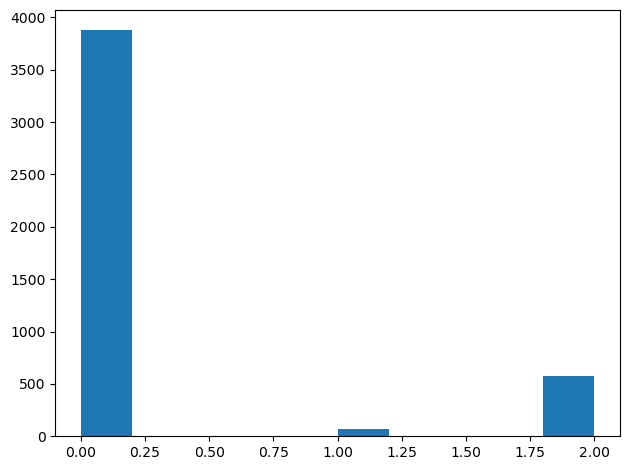

In [45]:
encoded_df['cluster'].value_counts()
plt.hist(encoded_df['cluster'])

plt.tight_layout()
plt.show()

<AxesSubplot: >

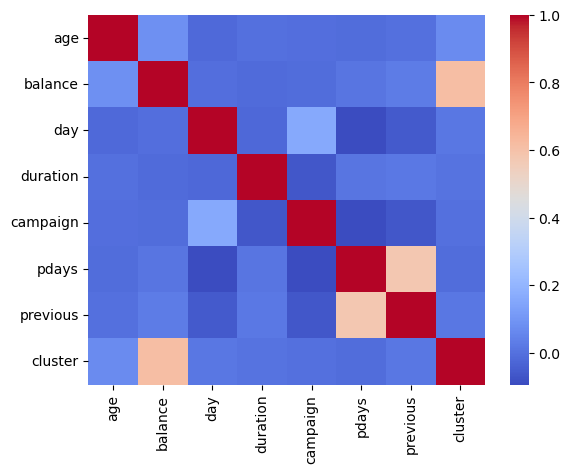

In [21]:
sns.heatmap(encoded_df.corr(), cmap='coolwarm')

(array([4.111e+03, 3.400e+02, 4.700e+01, 1.700e+01, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3313. ,  4137.1, 11587.2, 19037.3, 26487.4, 33937.5, 41387.6,
        48837.7, 56287.8, 63737.9, 71188. ]),
 <BarContainer object of 10 artists>)

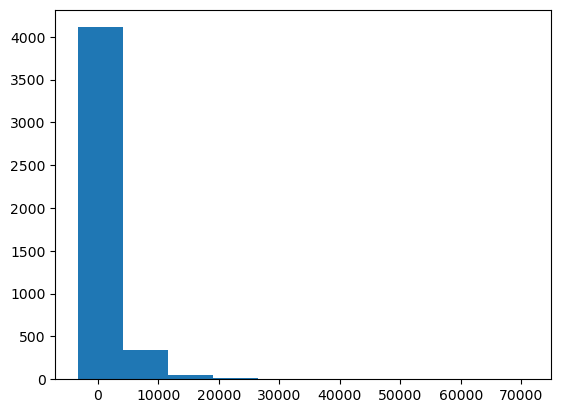

In [22]:
plt.hist(encoded_df['balance'])

(array([4000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         521.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

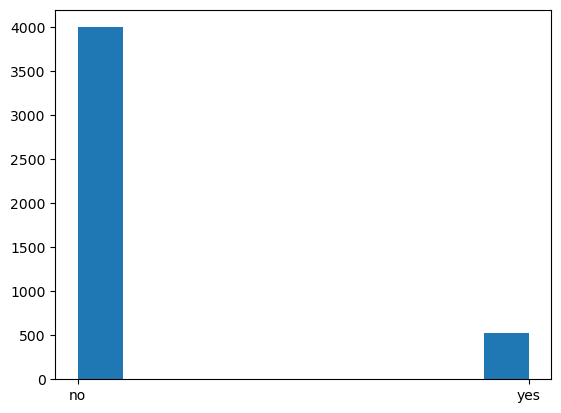

In [23]:
plt.hist(encoded_df['y'])

<AxesSubplot: xlabel='balance', ylabel='y'>

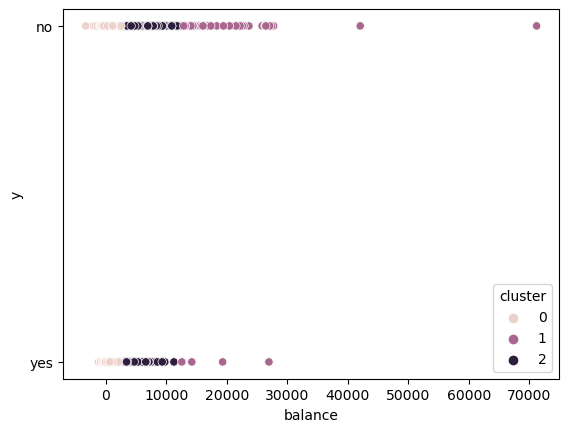

In [24]:
sns.scatterplot(x=encoded_df['balance'], y=encoded_df['y'], hue=encoded_df["cluster"])

<AxesSubplot: xlabel='age', ylabel='balance'>

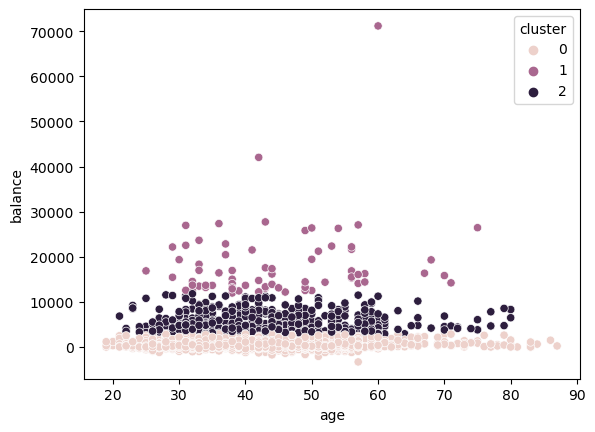

In [25]:
sns.scatterplot(x=encoded_df['age'], y=encoded_df['balance'], hue=encoded_df['cluster'])

In [26]:
encoded_df['id'] = encoded_df.index + 1
encoded_df.set_index('id').head(5)

,default,housing,contact,month,education,job,y,poutcome,marital,loan,age,balance,day,duration,campaign,pdays,previous,cluster
id,,,,,,,,,,,,,,,,,,
1,no,no,cellular,oct,primary,unemployed,no,unknown,married,no,30,1787,19,79,1,-1,0,0
2,no,yes,cellular,may,secondary,services,no,failure,married,yes,33,4789,11,220,1,339,4,2
3,no,yes,cellular,apr,tertiary,management,no,failure,single,no,35,1350,16,185,1,330,1,0
4,no,yes,unknown,jun,tertiary,management,no,unknown,married,yes,30,1476,3,199,4,-1,0,0
5,no,yes,unknown,may,secondary,blue-collar,no,unknown,married,no,59,0,5,226,1,-1,0,0


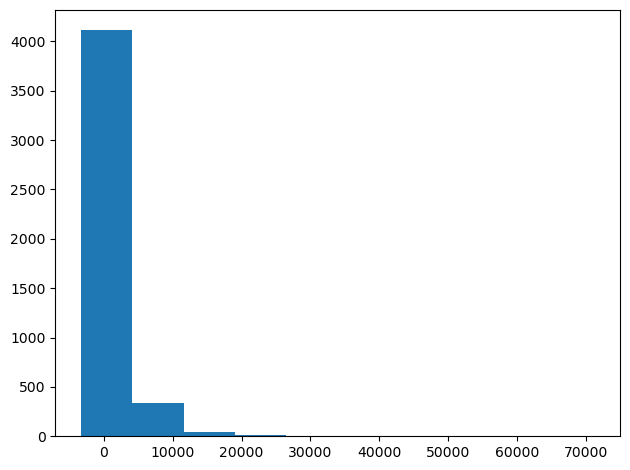

In [27]:
plt.hist(encoded_df['balance'])
plt.tight_layout()
plt.show()

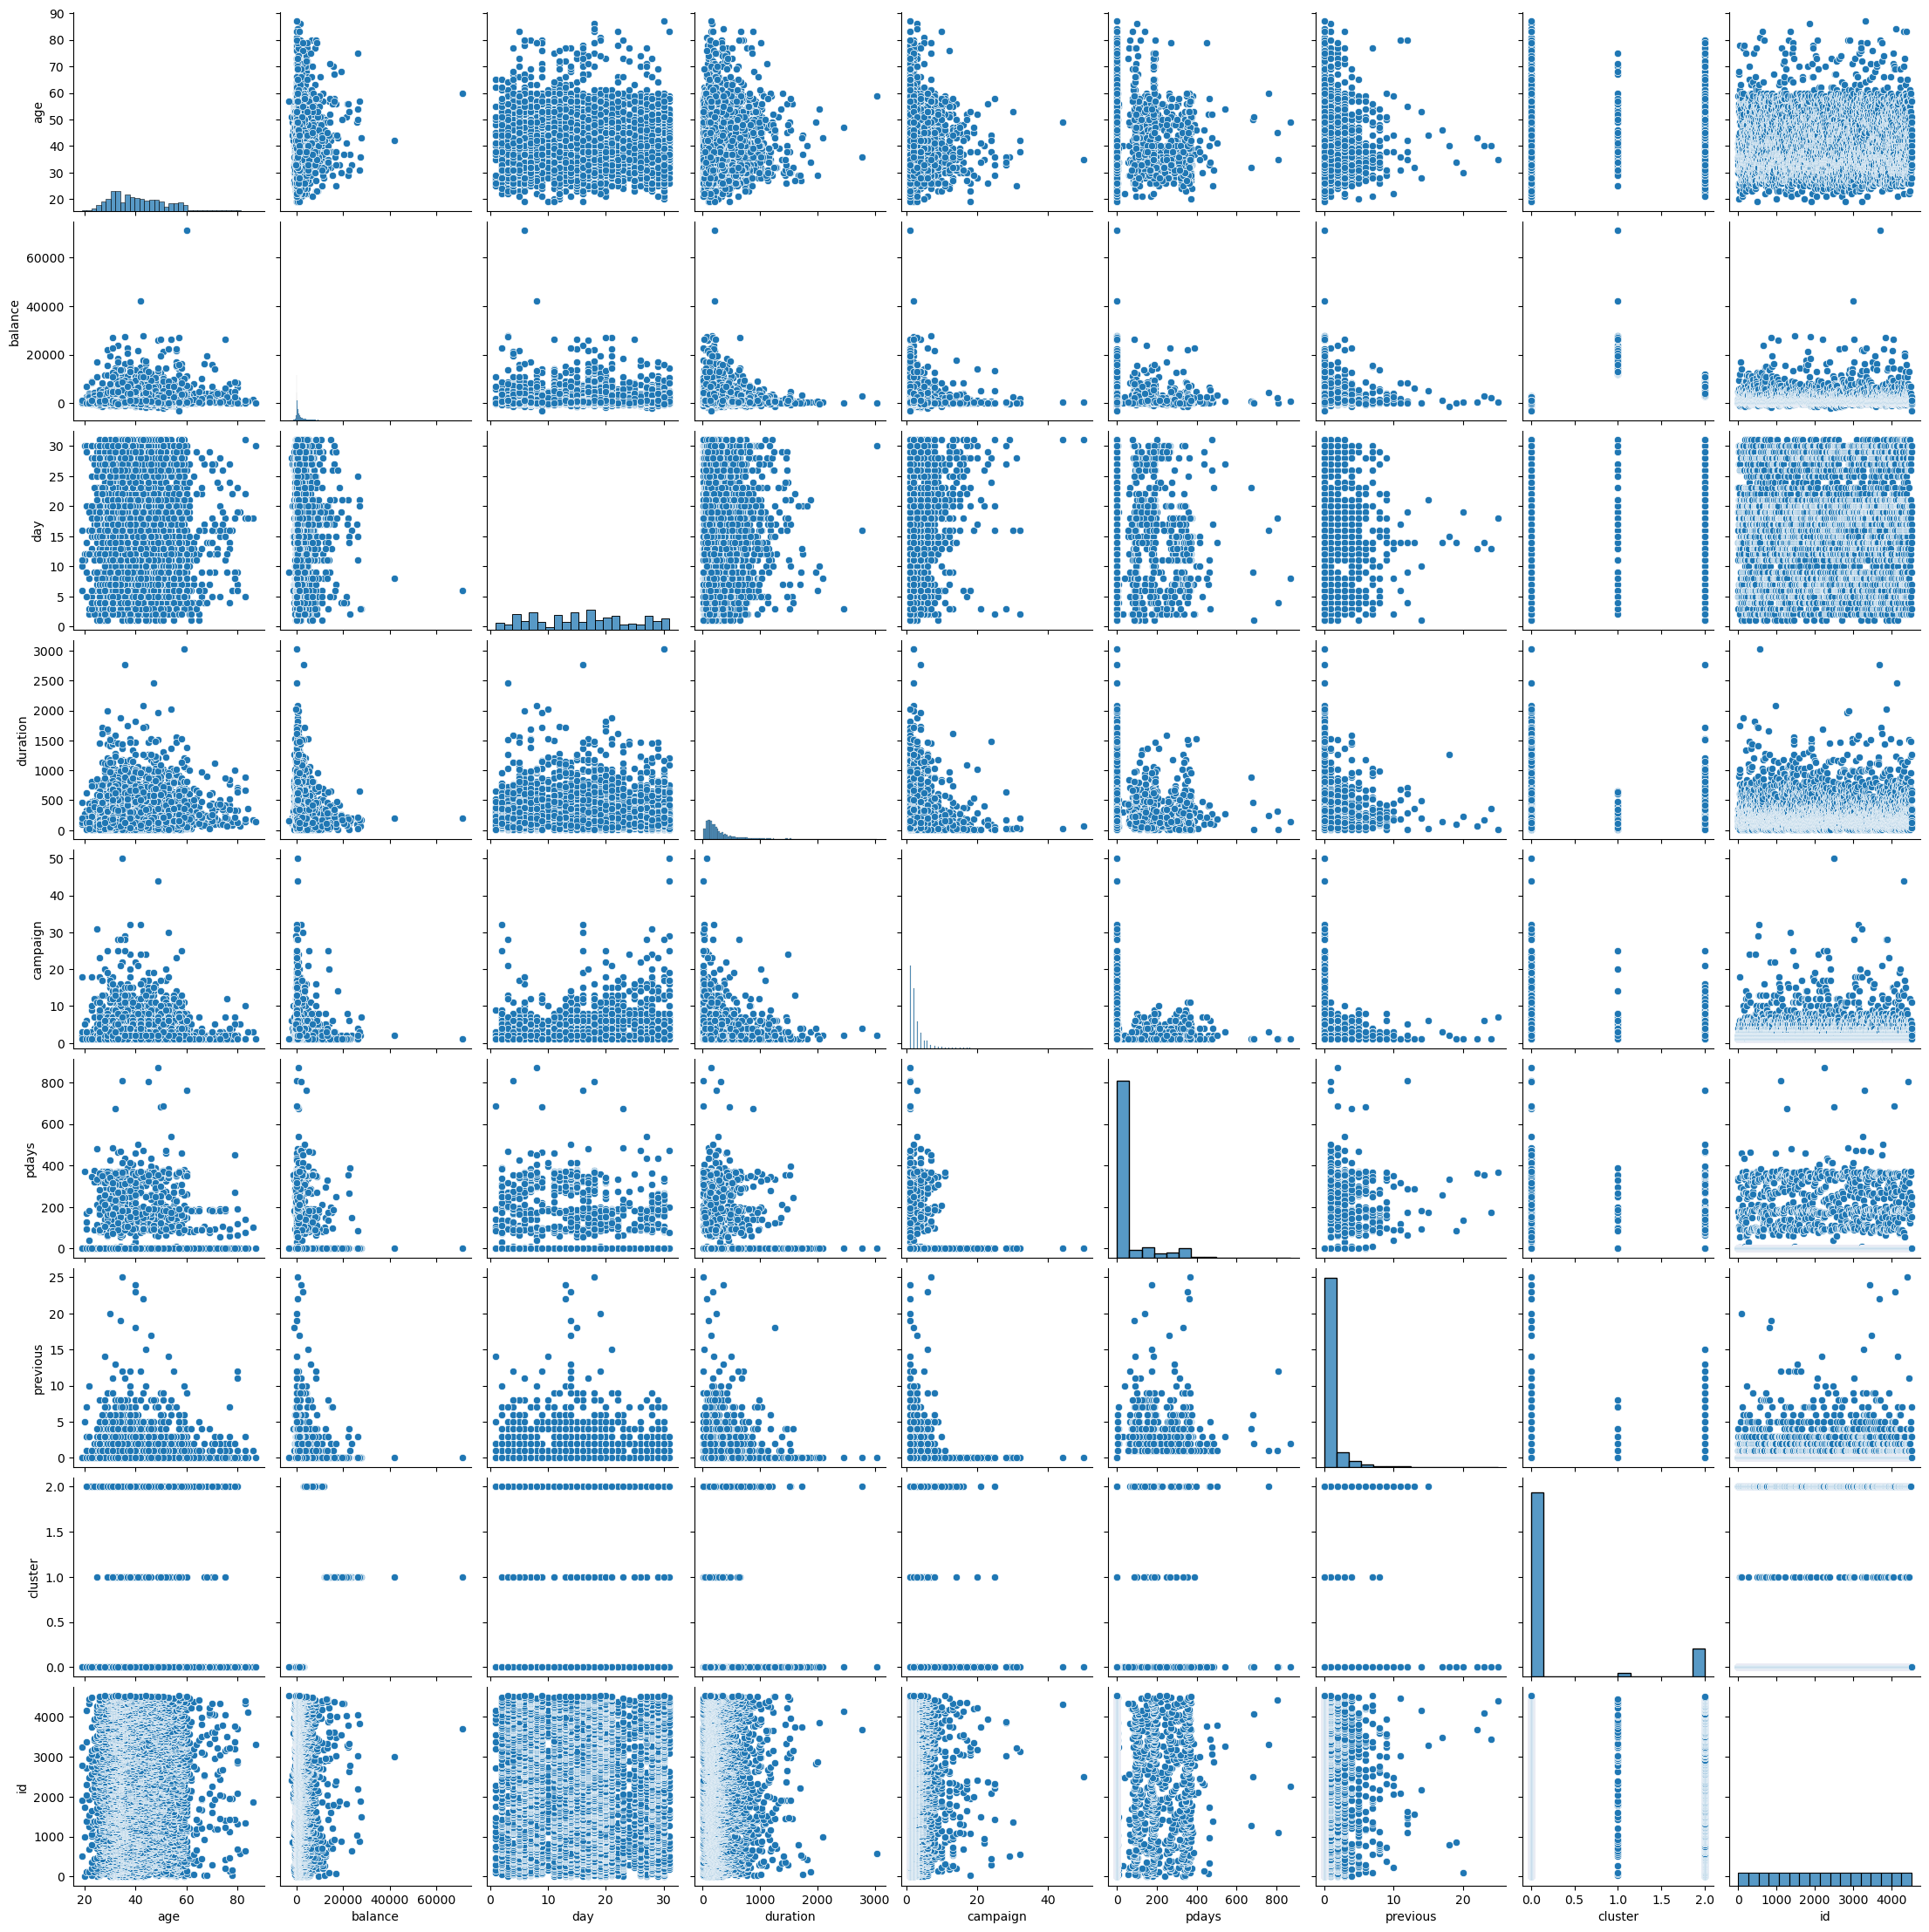

In [28]:
sns.pairplot(encoded_df)

In [29]:
encoded_df[['id', 'cluster']]

,id,cluster
0,1,0
1,2,2
2,3,0
3,4,0
4,5,0
...,...,...
4516,4517,0
4517,4518,0
4518,4519,0
4519,4520,0


In [ ]:
# TODO
# descobrir as carecteristicas das pessoas que mais subscrevem
# descobrir as caracteristicas das pessoas que nao subscrevem - tem haver com salario?
# tem haver com o que? (subscreverem ou nao)
# transformar em grafos - lib networkx
# visualizar no gephi